In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

#This next line makes our charts show up in the notebook
%matplotlib inline

table = pd.read_csv("mysheet.csv")
table.head(5)

,langs,mono-uuparser,mono-udify,multi-udify,our model,lang-emb,adapter-only (1024),adapter-only (2048),cpg-adapter,cpg-biaffine,"diff (ours,udify)",size
0,ar,81.8,83.51,80.12,84.42,84.47,82.84,82.88,84.35,81.68,4.30,6.1
1,en,87.6,89.18,88.48,89.67,89.49,88.29,88.37,89.80,89.00,1.19,12.5
2,eu,79.8,81.32,76.37,83.33,83.56,80.15,81.00,83.29,78.62,6.96,5.4
3,fi,83.9,87.29,85.06,89.01,89.11,86.85,87.21,89.02,86.22,3.95,12.5
4,he,85.9,87.88,84.36,88.75,88.66,86.19,86.85,88.50,86.83,4.39,5.2


In [2]:
a = table.loc[:12]
a.sort_values(by=['diff (ours,udify)'], inplace=True, ascending=False)
a = a.reset_index(drop=True)
a.head()

/Users/ahmetustun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,langs,mono-uuparser,mono-udify,multi-udify,our model,lang-emb,adapter-only (1024),adapter-only (2048),cpg-adapter,cpg-biaffine,"diff (ours,udify)",size
0,ko,84.2,84.16,77.97,85.91,85.64,81.25,83.77,85.84,81.39,7.94,4.4
1,eu,79.8,81.32,76.37,83.33,83.56,80.15,81.00,83.29,78.62,6.96,5.4
2,tr,64.9,65.97,62.69,69.63,68.45,65.96,66.30,69.53,63.79,6.94,3.7
3,zh,83.4,82.38,77.76,83.24,82.73,79.43,80.63,83.14,77.81,5.48,4.0
4,he,85.9,87.88,84.36,88.75,88.66,86.19,86.85,88.50,86.83,4.39,5.2


In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from copy import deepcopy
import os

plt.style.use('rob.mplstyle')
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

def setTicks(ax, labels, rotation = 45):
    ticks = []
    for i in range (len(labels)):
        ticks.append(i + .5)

    ax.xaxis.set_major_locator(mpl.ticker.LinearLocator(len(labels)+1))
    ax.xaxis.set_minor_locator(mpl.ticker.FixedLocator(ticks))

    ax.xaxis.set_major_formatter(mpl.ticker.NullFormatter())
    ax.xaxis.set_minor_formatter(mpl.ticker.FixedFormatter(labels))

    for tick in ax.xaxis.get_minor_ticks():
        tick.tick1line.set_markersize(0)
        tick.tick2line.set_markersize(0)
        tick.label1.set_horizontalalignment('center')
        tick.label1.set_rotation(rotation)

def drawGraph(ax,allScores, subDivision, mainDivision, xlabel, ylabel, ylim, location='best'):
    if len(allScores) != len(mainDivision):
        print("error, different size of scores and main labels:", len(allScores), len(mainDivision))
    if len(allScores[0]) != len(subDivision):
        print("error, different size of scores and sub labels:", len(allScores), len(mainDivision))
    print(mainDivision)

    bar_width = 1/ (len(subDivision) + 1)

    for subIdx in range(len(subDivision)):
        index = []
        scores = []
        for mainIdx in range(len(mainDivision)):
            index.append(mainIdx + (subIdx + 1) * bar_width)
            scores.append(allScores[mainIdx][subIdx])

        print(subDivision[subIdx], scores)
        ax.bar(index, scores, bar_width, label=subDivision[subIdx], color=colors[subIdx], edgecolor='k')
    print()

    setTicks(ax, mainDivision, 0)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim((0,len(mainDivision)))
    ax.set_ylim(ylim)

    leg = ax.legend(loc=location, fontsize='8')
    leg.get_frame().set_linewidth(0.5)

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from copy import deepcopy
import os

plt.style.use('rob.mplstyle')
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

def setTicks(ax, labels, rotation = 45):
    ticks = []
    for i in range (len(labels)):
        ticks.append(i + .5)

    ax.xaxis.set_major_locator(mpl.ticker.LinearLocator(len(labels)+1))
    ax.xaxis.set_minor_locator(mpl.ticker.FixedLocator(ticks))

    ax.xaxis.set_major_formatter(mpl.ticker.NullFormatter())
    ax.xaxis.set_minor_formatter(mpl.ticker.FixedFormatter(labels))

    for tick in ax.xaxis.get_minor_ticks():
        tick.tick1line.set_markersize(0)
        tick.tick2line.set_markersize(0)
        tick.label1.set_horizontalalignment('center')
        tick.label1.set_rotation(rotation)

def drawGraph2(ax,allScores, subDivision, mainDivision, xlabel, ylabel, ylim, ylim2, location='best'):
    if len(allScores) != len(mainDivision):
        print("error, different size of scores and main labels:", len(allScores), len(mainDivision))
    if len(allScores[0]) != len(subDivision):
        print("error, different size of scores and sub labels:", len(allScores), len(mainDivision))
    print(mainDivision)
    
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

    bar_width = 1/ (len(subDivision) + 1 -1)
    
    i = []
    for subIdx in range(len(subDivision)):
        index = []
        scores = []
        for mainIdx in range(len(mainDivision)):
            index.append(mainIdx + (subIdx + 1) * bar_width)
            scores.append(allScores[mainIdx][subIdx])
        i.append(index)
        print(subDivision[subIdx], scores)
        if subIdx == 0:
            ax.bar(i[subIdx], scores, bar_width, label=subDivision[subIdx], color=colors[subIdx], edgecolor='k')
        elif subIdx == 1:
            ax2.scatter(i[subIdx-1], scores, label=subDivision[subIdx], color=colors[subIdx], s=40, edgecolor='k', marker='D')
    print()

    setTicks(ax, mainDivision, 0)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim((0,len(mainDivision)))
    ax.set_ylim(ylim)
    ax2.set_ylim(ylim2)
    
    # ADD THIS LINE
    ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax.get_yticks())))
    ax2.grid(None)

    leg = ax.legend(loc='upper left', fontsize='8')
    leg.get_frame().set_linewidth(0.5)
    
    leg = ax2.legend(loc='upper right', fontsize='8')
    leg.get_frame().set_linewidth(0.5)

In [7]:
a = table
langs = list(a['langs'])
models = [a.columns[5]] + [a.columns[4]] #+ [a.columns[4]] #+ [a.columns[4]]
results = []
for i,l in enumerate(langs):
    las = []
    for m in models:
        las.append(float(a[m][i]))
    results.append(las)

['ko', 'eu', 'tr', 'zh', 'he', 'ar', 'sv', 'fi', 'ru', 'ja', 'hi', 'it', 'en']
difference (udapter, multi-udify) [7.94, 6.96, 6.94, 5.48, 4.39, 4.3, 4.04, 3.95, 3.25, 2.84, 2.64, 1.46, 1.19]
treebank size (K) [4.4, 5.4, 3.7, 4.0, 5.2, 6.1, 4.3, 12.5, 15.0, 7.1, 13.3, 13.1, 12.5]



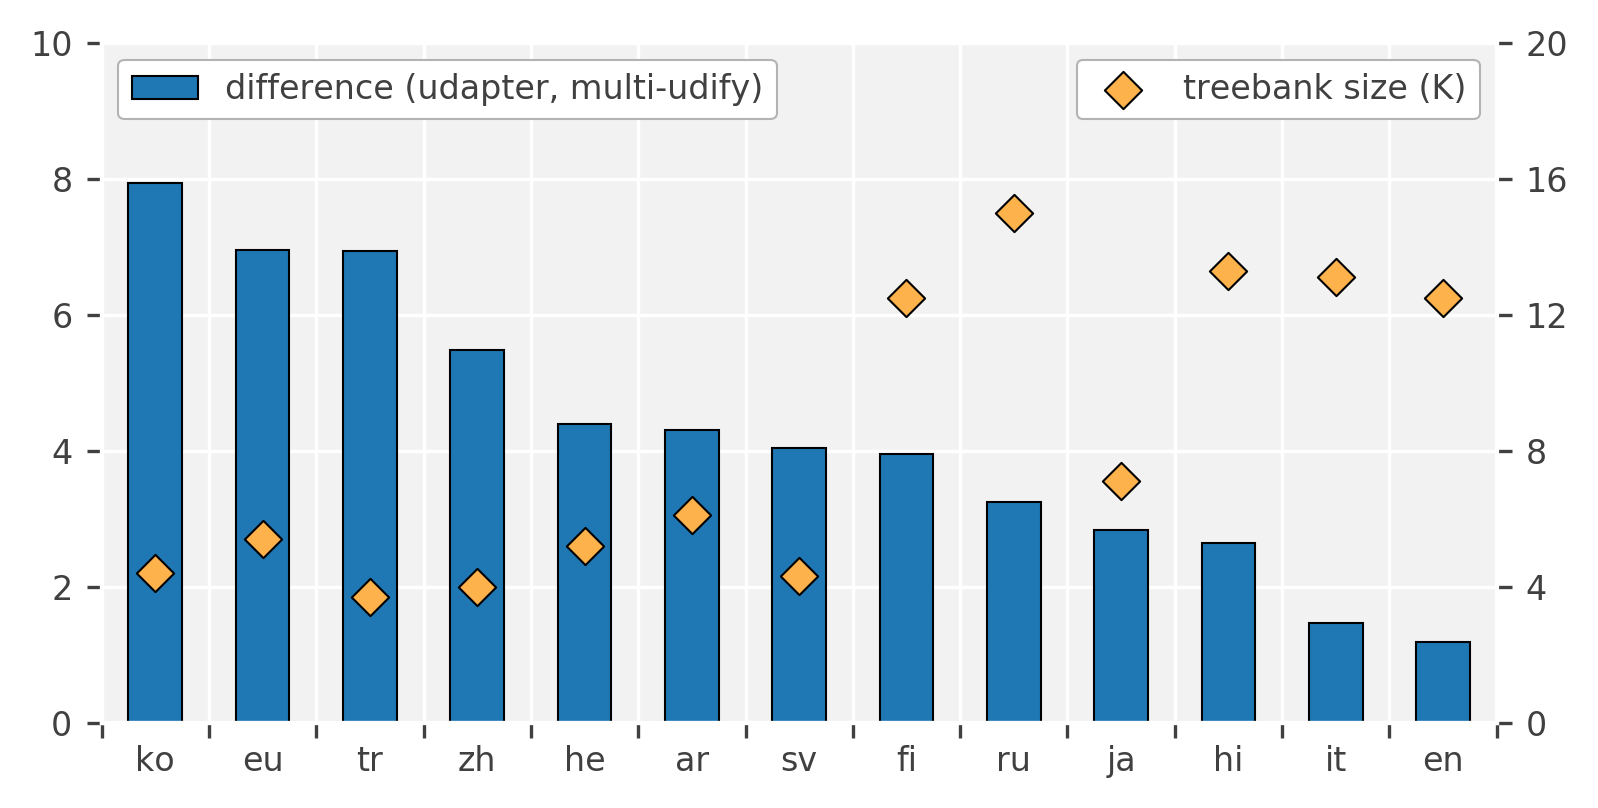

In [23]:
fig, ax = plt.subplots(figsize=(6,3), dpi=300)
models = ['difference (udapter, multi-udify)', 'treebank size (K)']
drawGraph2(ax, sorted(results, reverse=True), models, langs, '','', (0,10), (0,20), 'upper right')
plt.savefig('hr-delta.pdf', bbox_inches='tight', edgecolor='white', facecolor='none' )

# Make some labels.
#sizes = a['size']

#for rect, sizes in zip(rects, sizes):
#    height = rect.get_height()
#    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.3, sizes,
#            ha='center', va='bottom', fontsize=8)

In [ ]:
print(len(results))
fig, ax = plt.subplots(figsize=(12,3), dpi=300)
models = ['difference (ours, multi-udify)']
drawGraph(ax, sorted(results, reverse=True), models, langs, '','', (-2.5,10), 'upper right')
plt.savefig('lr-delta.pdf', bbox_inches='tight', edgecolor='white', facecolor='none' )

In [ ]:
fig, ax = plt.subplots(figsize=(8,3), dpi=300)
drawGraph(ax, results[:14], models, langs[:14], '','', (60,95), 'upper right')
#plt.savefig('hr.pdf', bbox_inches='tight', edgecolor='white', facecolor='none' )

In [ ]:
fig, ax = plt.subplots(figsize=(8,3), dpi=300)
drawGraph(ax, results[14:], models, langs[14:], '','', (5,85), 'upper right')
#plt.savefig('lr.pdf', bbox_inches='tight', edgecolor='white', facecolor='none' )

['high-resource', 'low-resource (zero-shot)']
mono-udify [86.26, 6]
multi-udify [83.03, 35.34]
our model [87.29, 36.52]



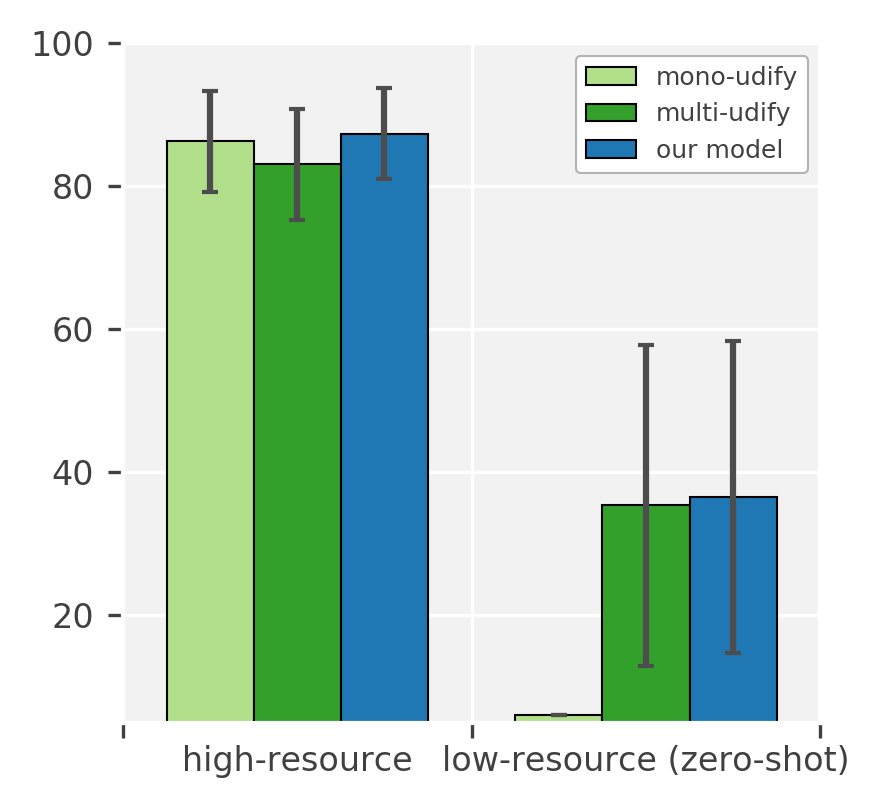

In [36]:
fig, ax = plt.subplots(figsize=(3,3), dpi=300)
lang_set = ['high-resource', 'low-resource (zero-shot)']
#averages = [results[13], results[-1]]
averages = [[86.26, 83.03, 87.29], [6, 35.34, 36.52]]
std = [[7.09,7.78,6.36], [0,22.5,21.8]]
models = ['mono-udify', 'multi-udify', 'our model']
drawGraph3(ax, averages, std, models, lang_set, '','', (5,100), 'upper right')
plt.savefig('avg.pdf', bbox_inches='tight', edgecolor='white', facecolor='none' )

['high-resource', 'low-resource (zero-shot)']
From scratch
& Centroid [87.07153846, 8.972666667]
Typological
features [87.28615385, 36.52266667]



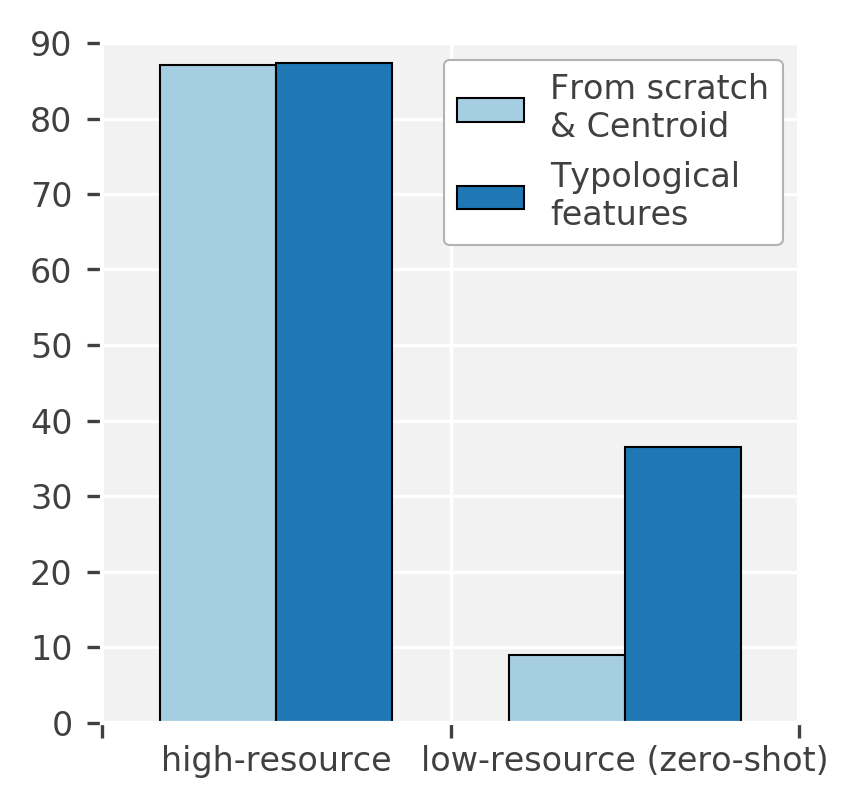

In [14]:
fig, ax = plt.subplots(figsize=(3,3), dpi=300)
lang_set = ['high-resource', 'low-resource (zero-shot)']
#lang_set = ['HR', 'LR']
models = ['From scratch\n& Centroid', 'Typological\nfeatures']
averages = [results[13], results[-1]]
drawGraph(ax, averages, models, lang_set, '','', (0,90), 'upper right')
plt.savefig('typo.pdf', bbox_inches='tight', edgecolor='white', facecolor='none' )

['low-resource (zero-shot) - 13']
Random Init. [8.7]
Proxy Languages [31.64]
Typological Features [38.9]



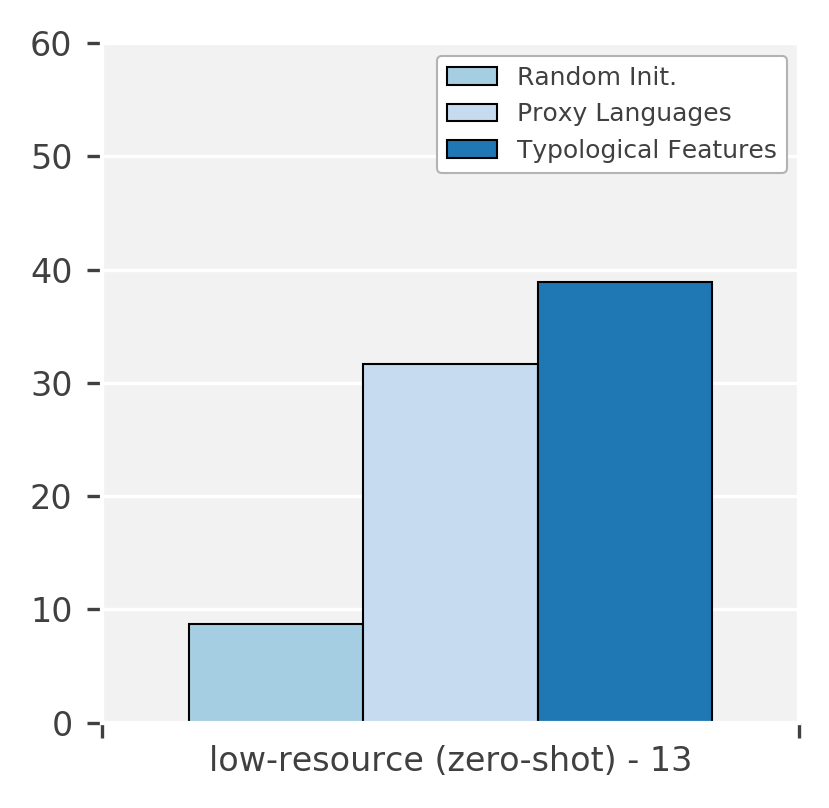

In [34]:
fig, ax = plt.subplots(figsize=(3,3), dpi=300)
lang_set = ['low-resource (zero-shot) - 13']
models = ['Random Init.', 'Proxy Languages', 'Typological Features']
averages = [[8.70, 31.64, 38.9]]
drawGraph(ax, averages, models, lang_set, '','', (0,60), 'upper right')
plt.savefig('proxy.pdf', bbox_inches='tight', edgecolor='white', facecolor='none' )

['high-resource', 'low-resource (zero-shot)']
adapter-only
(1024) [85.03769231, 32.76]
cpg
(adapters) [87.19076923, 34.01966667]
cpg
(adap.+biaf.)* [87.28615385, 36.52266667]



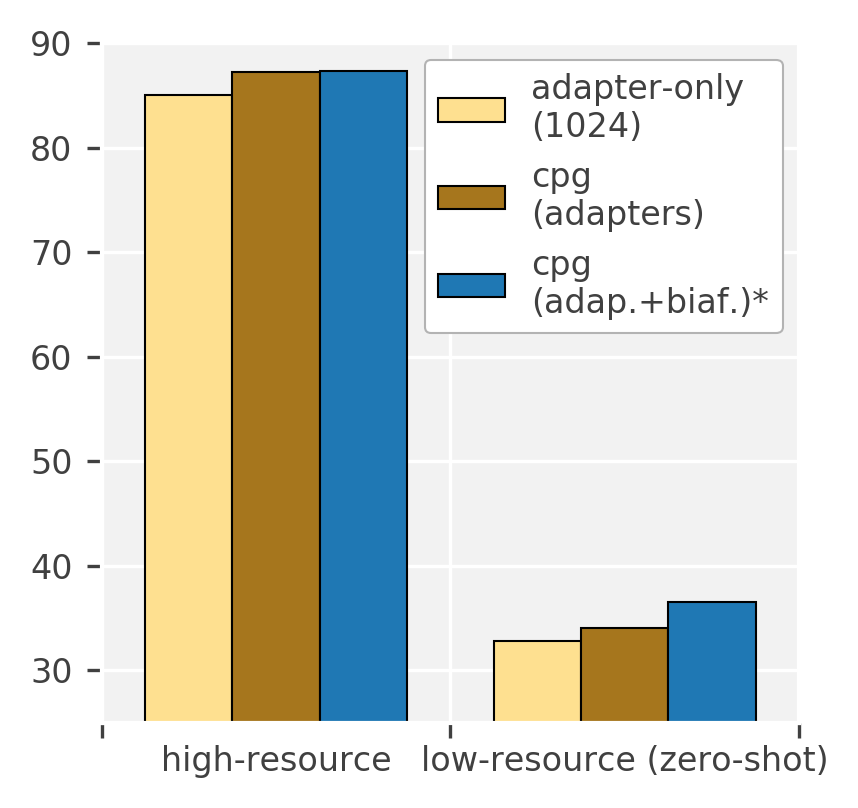

In [62]:
fig, ax = plt.subplots(figsize=(3,3), dpi=300)
lang_set = ['high-resource', 'low-resource (zero-shot)']
models = ['adapter-only\n(1024)', 'cpg\n(adapters)', 'cpg\n(adap.+biaf.)*']
averages = [results[13], results[-1]]
drawGraph(ax, averages, models, lang_set, '','', (25,90), 'upper right')
plt.savefig('abl.pdf', bbox_inches='tight', edgecolor='white', facecolor='none' )

['HR', 'LR']
multi-udify [83.02615385, 35.34466667]
adapter-only
(1024) [85.03769231, 32.76]
adapter-only
(2048) [85.66384615, 32.22466667]
udapter [87.28615385, 36.52266667]



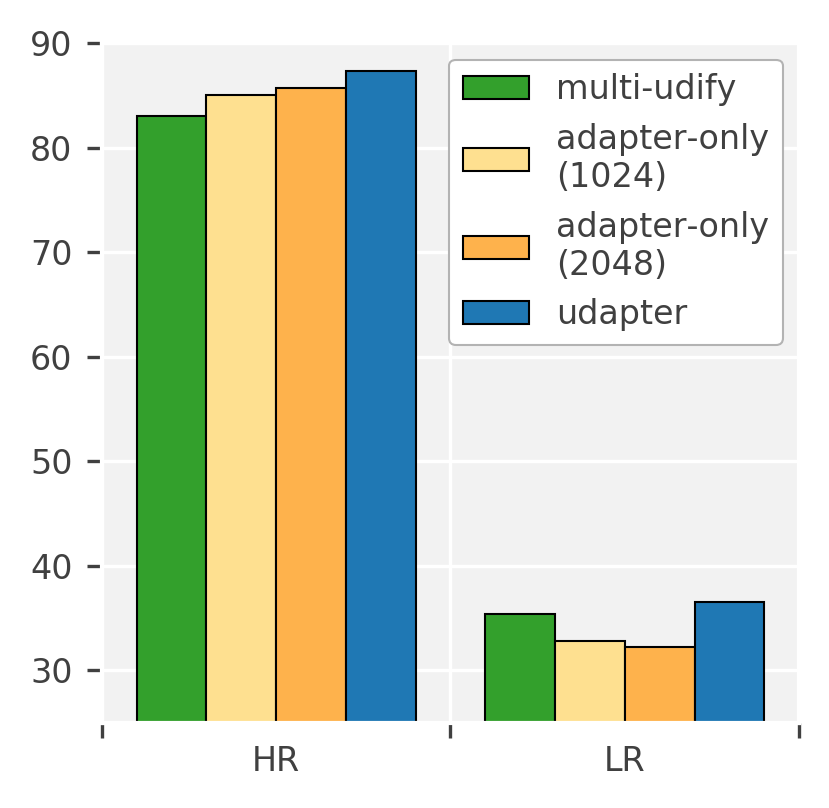

In [54]:
fig, ax = plt.subplots(figsize=(3,3), dpi=300)
lang_set = ['HR', 'LR']
models = ['multi-udify', 'adapter-only\n(1024)', 'adapter-only\n(2048)', 'udapter']
averages = [results[13], results[-1]]
drawGraph(ax, averages, models, lang_set, '','', (25,90), 'upper right')
plt.savefig('adap.pdf', bbox_inches='tight', edgecolor='white', facecolor='none' )

In [42]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from copy import deepcopy
import os

plt.style.use('rob.mplstyle')
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

def setTicks(ax, labels, rotation = 45):
    ticks = []
    for i in range (len(labels)):
        ticks.append(i + .5)

    ax.xaxis.set_major_locator(mpl.ticker.LinearLocator(len(labels)+1))
    ax.xaxis.set_minor_locator(mpl.ticker.FixedLocator(ticks))

    ax.xaxis.set_major_formatter(mpl.ticker.NullFormatter())
    ax.xaxis.set_minor_formatter(mpl.ticker.FixedFormatter(labels))

    for tick in ax.xaxis.get_minor_ticks():
        tick.tick1line.set_markersize(0)
        tick.tick2line.set_markersize(0)
        tick.label1.set_horizontalalignment('center')
        tick.label1.set_rotation(rotation)

def drawGraph3(ax,allScores, std, subDivision, mainDivision, xlabel, ylabel, ylim, location='best'):
    if len(allScores) != len(mainDivision):
        print("error, different size of scores and main labels:", len(allScores), len(mainDivision))
    if len(allScores[0]) != len(subDivision):
        print("error, different size of scores and sub labels:", len(allScores), len(mainDivision))
    print(mainDivision)

    bar_width = 1/ (len(subDivision) + 1)

    for subIdx in range(len(subDivision)):
        index = []
        scores = []
        deviations =[]
        for mainIdx in range(len(mainDivision)):
            index.append(mainIdx + (subIdx + 1) * bar_width)
            scores.append(allScores[mainIdx][subIdx])
            deviations.append(std[mainIdx][subIdx])

        print(subDivision[subIdx], scores)
        ax.bar(index, scores, bar_width, label=subDivision[subIdx], color=colors[subIdx], edgecolor='k', 
               yerr=deviations, ecolor='#4d4d4d', capsize=2)
    print()

    setTicks(ax, mainDivision, 0)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim((0,len(mainDivision)))
    ax.set_ylim(ylim)

    leg = ax.legend(loc=location, fontsize='8')
    leg.get_frame().set_linewidth(0.5)

['syntax', 'phonology', 'inventory']
Language-Typology Features [0.5488218, 0.5439909, 0.54592335]



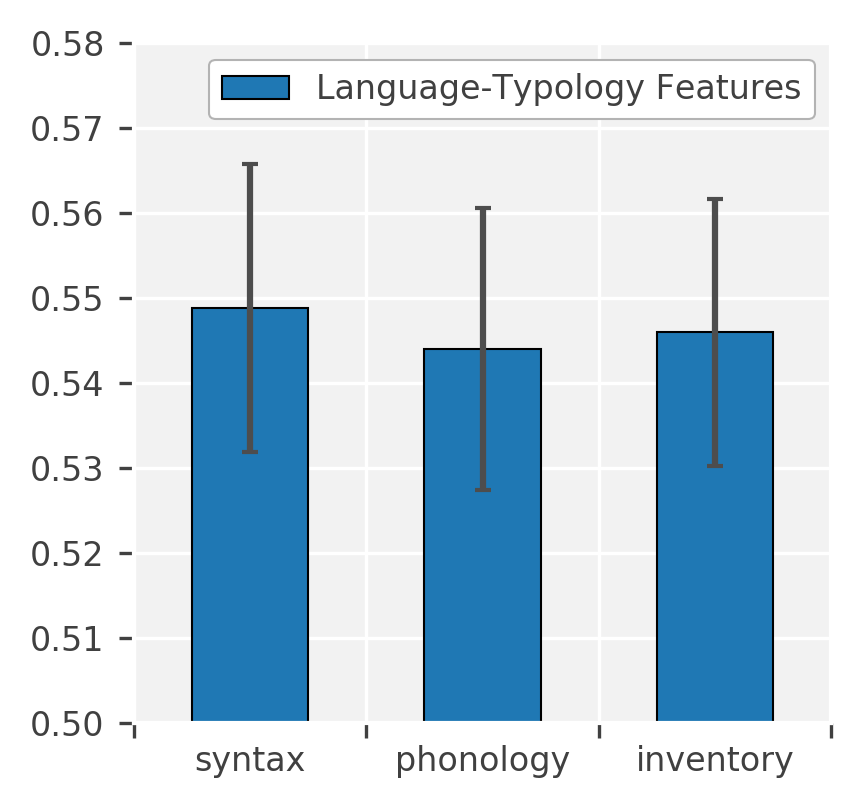

In [43]:
fig, ax = plt.subplots(figsize=(3,3), dpi=300)
models = ['Language-Typology Features']
#averages = [results[13], results[-1]]
#averages = [[0.89082074], [0.88452846], [0.89995545]]
averages = [[0.5488218], [0.5439909], [0.54592335]]
#std = [[0.10341739], [0.091011345], [0.09239617]]
std = [[0.016990615], [0.016622854], [0.015670495]]
lang_set = ['syntax', 'phonology', 'inventory']
drawGraph3(ax, averages, std, models, lang_set, '','', (.5,.58), 'upper right')
plt.savefig('feat.pdf', bbox_inches='tight', edgecolor='white', facecolor='none' )